<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('C:/users/rickk/Documents/DataScience/GeneralAssembly/Project02/data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer: apply shape. 979 rows and 6 columns
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer: apply dtypes. 1 integer (duration), 1 float (star_rating), all other columns are object, which makes sense
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [6]:
# quick check on whether there are any null values or NaN, which does not seem to be the case --- clean set for once. Thanks.
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average movie duration.

In [7]:
# Answer: select column "duration" and apply .mean() method. Your average movies runs for ~2 hours
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [8]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [9]:
# Answer: select the movie(s) that equal the shortest duration (64min), as defined by .min() method and store that in a variable
# use variable to print out all rows that fulfill the minimum condition as True
shortest = movies.loc[:,'duration'] == movies.loc[:,'duration'].min()
movies.loc[shortest,:]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


**Answer**: The shortest movie with **64 min** in the imdb dataset is called **Freaks** and features actors like Leila Hyams and Wallace Ford.

In [10]:
# Answer: select the movie(s) that equal the max duration (242min), as defined by .max() method and store that in a variable
longest = movies.loc[:,'duration'] == movies.loc[:,'duration'].max()
movies.loc[longest,:]

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


**Answer**: The longest movie in the imdb dataset is an adaptation of William Shakespeare's **Hamlet** that runs for **4 hours straight**

#### Create a histogram of duration, choosing an "appropriate" number of bins.

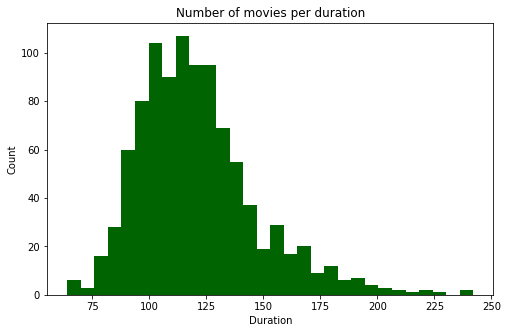

In [11]:
# Answer: Use .plot(hist) with various parameters. bin size=30 seems to show enough but not too much granularity
# with smaller bin sizes it's hard to see the differentiation between 100 and 130 minutes length as well as past 160 min length
movies.loc[:,'duration'].plot(kind='hist', x='duration', bins=30, color='darkgreen',
                             figsize=(8,5));
plt.xlabel('Duration');
plt.ylabel('Count');
plt.title('Number of movies per duration');

#### Use a box plot to display that same data.

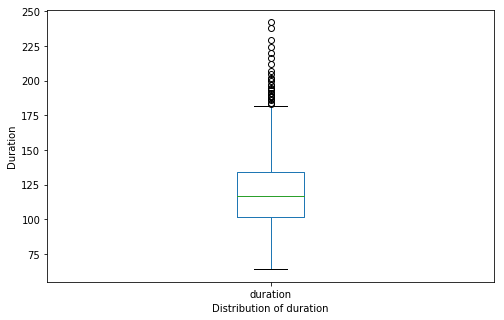

In [12]:
# Answer: The box plot re-confirms the average of ~120 minutes and also shows the 25%-tile and 75%-tile
movies.loc[:,'duration'].plot(kind='box', figsize=(8,5));
plt.xlabel('Distribution of duration')
plt.ylabel('Duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [13]:
# Answer: count values in column 'content_rating' which reveals that half of the movies are rated R, followed by PG-13 with 189
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

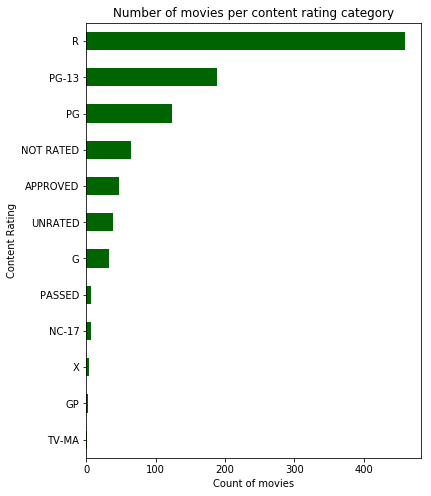

In [14]:
# Answer: Data is not continuous to bar chart makes most sense. Either horizontal (here) or vertical (without 'h' classifier)
movies.loc[:,'content_rating'].value_counts(ascending=True).plot(kind='barh', figsize=(6,8), color='darkgreen');
plt.xlabel('Count of movies');
plt.ylabel('Content Rating');
plt.title('Number of movies per content rating category');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
# Answer: replace function
movies.loc[:,'content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED', inplace=True)
movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [16]:
# Answer: replace function
movies.loc[:,'content_rating'].replace(['X','TV-MA'],'NC-17', inplace=True)
movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [17]:
# Answer: Three movies have no content rating
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [18]:
# Answer: The three movies are from different genres and should have different content ratings
# Quick google-search: Butch Cassidy and the Sundance Kid, Where Eagles Dare are rated PG; True Grit is rated G
movies.loc[movies.loc[:,'content_rating'].isnull(),:]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [19]:
movies.iloc[187,2] = 'PG'
movies.iloc[649,2] = 'PG'
movies.iloc[936,2] = 'G'
print(movies.iloc[187,2], movies.iloc[649,2], movies.iloc[936,2])

PG PG G


In [20]:
# check if missing values are gone
movies.loc[:,'content_rating'].isnull().sum()

0

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [21]:
# Answer: split data into two groups based on column 'duration'
s = 120

df_long_movies = movies.loc[movies.loc[:,'duration'] >= s,:]
df_short_movies= movies.loc[movies.loc[:,'duration'] < s, :]

In [22]:
# to calculate the average we apply .mean() method - the star rating is not that different. 7.95 for long and 7.84 for short
print(df_long_movies.mean())
print(df_short_movies.mean())

star_rating      7.948899
duration       142.458150
dtype: float64
star_rating      7.838667
duration       102.405714
dtype: float64


In [23]:
# can double check on df_long_movies and df_short_movies here:
df_short_movies.describe()

,star_rating,duration
count,525.000000,525.000000
mean,7.838667,102.405714
std,0.302361,11.180902
min,7.400000,64.000000
25%,7.600000,95.000000
50%,7.800000,103.000000
75%,8.000000,112.000000
max,8.900000,119.000000


#### Use a visualization to detect whether there is a relationship between duration and star rating.

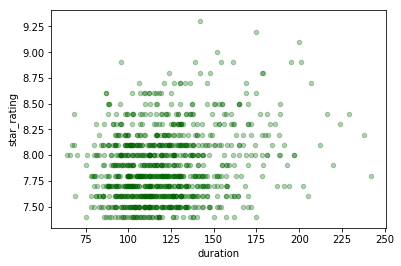

In [24]:
# Answer: scatterplot x=duration, y='star_rating'
movies.plot(kind='scatter', x='duration', y='star_rating',
           color='darkgreen', alpha=0.3);

In [25]:
movies.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


#### Calculate the average duration for each genre.

In [26]:
# Answer: groupby 'genre' and 'duration'.mean()
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

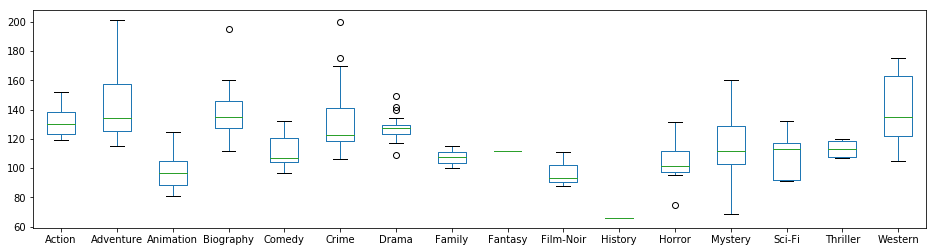

In [27]:
# subplots to show the duration per movie visually on a boxplot - using .pivot_table() method
movies_pivot = movies.pivot_table(index='star_rating', columns='genre', values='duration')
movies_pivot.plot(kind='box', figsize=(16,4))

## Advanced level

#### Visualize the relationship between content rating and duration.

In [28]:
# Answer: scatter plot x=duration, y = 'content rating'. Which requires both to be numeric
# Step 1: attach numbers to each rating with dictionary in new df [R, PG-13,PG, G, NC-17, UNRATED]
movies.loc[:,'content_rating'].value_counts()
movies.loc[:,'content_rating_num'] = movies.loc[:,'content_rating'].map({'UNRATED': 0, 'G': 1, 'PG': 2,
                                                                        'PG-13': 3, 'R': 4, 'NC-17': 5})
movies.loc[:,'content_rating_num'].value_counts().sort_index()

0    160
1     33
2    125
3    189
4    460
5     12
Name: content_rating_num, dtype: int64

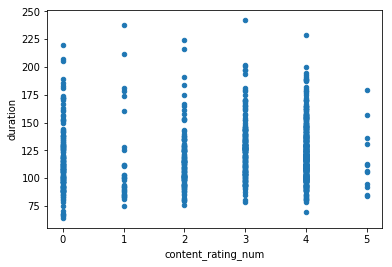

In [29]:
# Step 2: display as a scatter plot, if it recognizes the new values as numeric
movies.plot(kind='scatter', x='content_rating_num', y='duration');

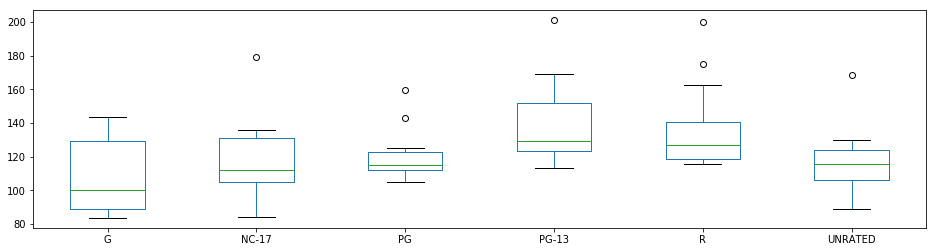

In [30]:
# Alternative.
# to show the duration per movie visually on a boxplot per content_rating - using .pivot_table() method, again
movies_pivot2 = movies.pivot_table(index='star_rating', columns='content_rating', values='duration')
movies_pivot2.plot(kind='box', figsize=(16,4));

#### Determine the top rated movie (by star rating) for each genre.

In [31]:
# Answer: groupby 'genre' and 'star_rating' and 'title'. max() to generate a table with the max-rating per title
movies.groupby('genre')['star_rating','title'].max()

,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


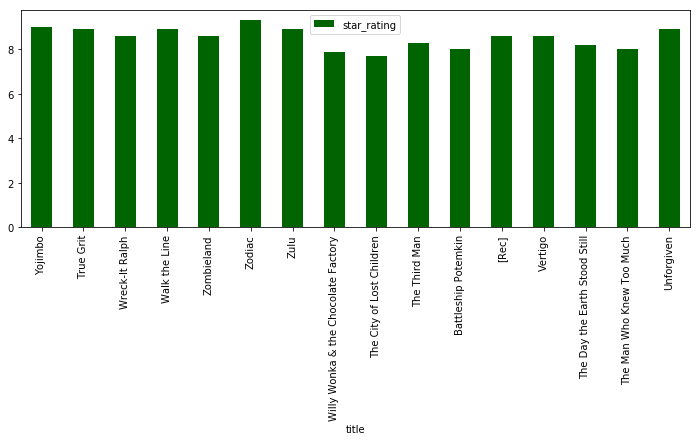

In [32]:
# Answer: visualization of titles with top ratings in their respective categories
movies.groupby('genre')['star_rating','title'].max().plot(kind='bar', color='darkgreen', x='title', y='star_rating',
                                                         figsize=(12,4));

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [33]:
# Answer: sort titles into two lists - one that contains items that were seen at least twice and unique values
# this shows four movie titles (True Grit, Dracula, Les Miserables, The Girl with the Dragon Tattoo)
def find_duplicates(seq):
    already_seen = set()
    seen_once = already_seen.add  # all titles get into seen_once unless they are already in this list
    duplicates = set(x for x in seq if x in already_seen or seen_once(x)) # turning the set into a list
    return list(duplicates)

found_duplicates = find_duplicates(movies.loc[:,'title'])
print(found_duplicates)

['The Girl with the Dragon Tattoo', 'True Grit', 'Les Miserables', 'Dracula']


In [34]:
# checking whether they are true duplicates are maybe versions of the same movie from different years and with different actors
dupes = movies.loc[:,'title'].apply(lambda x: x in found_duplicates) # creating new list with the results from list generated
movies.loc[dupes,:].sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list,content_rating_num
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",0
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",4
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",3
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",3
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",4
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",4
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",3
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",1


**Answer**: Looking through the titles that were flagged as potential duplicates, it becomes apparent that they are not truly duplicates. They all have different actors and durations.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [35]:
# Answer: with simple value_counts() by genre we can see that a few categories have less than 10 movie titles in them
# the five that have less than 10 are Western, Sci-Fi, Thriller, Film-Noir, Family, History, and Fantasy
movies.loc[:,'genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [36]:
# manually creating a list from the information obtained above
at_least_10 = ('Drama', 'Comedy','Action','Crime', 'Biography','Adventure','Animation','Horror', 'Mystery')

In [37]:
movies.loc[movies.loc[:,'genre'].isin(at_least_10)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [168]:
# Answer: same as above, except starting off with creating a new list or columns that stores counts > 10
l = 10
at_least_ten = movies.loc[:,'genre'].value_counts().index.tolist()
at_least_ten

['Drama',
 'Comedy',
 'Action',
 'Crime',
 'Biography',
 'Adventure',
 'Animation',
 'Horror',
 'Mystery',
 'Western',
 'Sci-Fi',
 'Thriller',
 'Film-Noir',
 'Family',
 'Fantasy',
 'History']

In [ ]:
# stuck here - how to pass a condition into the value_count and automatically generate the list I typed manually in Option 1?

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [59]:
# Average star ratings by genre with groupby and .mean() method
df_ratings_genre = movies.groupby('genre')['star_rating'].mean()
df_ratings_genre

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [60]:
# boolean series gives true or false
l = 10
mask = movies.loc[:,'genre'].value_counts() > l
mask

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Sci-Fi       False
Thriller     False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

In [61]:
# overlay the results of the first calculation with the boolean values from the second.
df_ratings_genre[mask]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [139]:
# Answer: created a new grouping based on mean and count per genre
grouped_by_genre = movies.groupby('genre')['star_rating'].agg(['count', 'mean']).sort_values('count', ascending=False)
grouped_by_genre # creates a new dataframe that includes genre, count, mean for the star_rating

,count,mean
genre,,
Drama,278,7.902518
Comedy,156,7.822436
Action,136,7.884559
Crime,124,7.916935
Biography,77,7.862338
Adventure,75,7.933333
Animation,62,7.914516
Horror,29,7.806897
Mystery,16,7.975000


In [158]:
# the column header is 'count' which the formula confuses with the mathematical operation
# manually dropping the last 7 rows from the new dataframe
grouped_by_genre[:-7]

,count,mean
genre,,
Drama,278,7.902518
Comedy,156,7.822436
Action,136,7.884559
Crime,124,7.916935
Biography,77,7.862338
Adventure,75,7.933333
Animation,62,7.914516
Horror,29,7.806897
Mystery,16,7.975000


In [192]:
# Alternative method: returns values of 0 or 1 for genre_count (new) with dictionary
# Note: dictionaries will be removed from next Python version 
A = movies.groupby('genre').agg({'genre': lambda group: len(group)>10, 
                                 'star_rating': 'mean'}).sort_values('genre', ascending=False)
print(A)

           genre  star_rating
genre                        
Action      True     7.884559
Adventure   True     7.933333
Animation   True     7.914516
Biography   True     7.862338
Comedy      True     7.822436
Crime       True     7.916935
Drama       True     7.902518
Horror      True     7.806897
Mystery     True     7.975000
Family     False     7.850000
Fantasy    False     7.700000
Film-Noir  False     8.033333
History    False     8.000000
Sci-Fi     False     7.920000
Thriller   False     7.680000
Western    False     8.255556


#### Option 5 - [katharina only]: try something different > add column with count_genre and filter based on that to get average star_rating

In [110]:
# use groupby genre and transform 'count' to add count of occurence for that genre intp each row in which it appears
movies['count_genre'] = movies.groupby('genre')['genre'].transform('count')

# set minimum threshold back to 10
l= 10

# filter the dataframe based on the new column created and use .groupby() and .mean() to get average rating per genre 
count_greater_10 = movies.loc[:,'count_genre'] > l
movies.loc[count_greater_10,:].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

In [196]:
# cleaning up. Removing columns I used earlier for other calculations
movies.drop(['content_rating_num','count_genre'], axis=1, inplace=True)

In [209]:
movies.loc[:,'actors_list'].describe(include='all')

count                                                   979
unique                                                  969
top       [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
freq                                                      6
Name: actors_list, dtype: object

** Suggestion 1 **: There seem to be a few movies (~10 which are not unique) - could filter for those.
** Suggestion 2 **: Could turn actors list into an array and search for actor who appeared in most movies - similar to Chipotle exercise

In [224]:
actors = movies.loc[:,'actors_list'].values
actors

array(["[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']",
       "[u'Marlon Brando', u'Al Pacino', u'James Caan']",
       "[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']",
       "[u'Christian Bale', u'Heath Ledger', u'Aaron Eckhart']",
       "[u'John Travolta', u'Uma Thurman', u'Samuel L. Jackson']",
       "[u'Henry Fonda', u'Lee J. Cobb', u'Martin Balsam']",
       "[u'Clint Eastwood', u'Eli Wallach', u'Lee Van Cleef']",
       "[u'Elijah Wood', u'Viggo Mortensen', u'Ian McKellen']",
       "[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kingsley']",
       "[u'Brad Pitt', u'Edward Norton', u'Helena Bonham Carter']",
       "[u'Elijah Wood', u'Ian McKellen', u'Orlando Bloom']",
       "[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt', u'Ellen Page']",
       "[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']",
       "[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']",
       "[u'Elijah Wood', u'Ian McKellen', u'Viggo Mortensen']",
       "[u'Matthew McConaughey', u'Anne Hathaway